**Project: Financial Inclusion in Africa**

    
**Tool to use;Python.**

**Mission**:
    
To do an analysis of the financial inclusion in East Africa mainly through ownership of bank accounts.



In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Loading the dataset
train=pd.read_csv('Train.csv')
train

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [3]:
#Checking number of rows and columns
train.shape

(23524, 13)

In [4]:
#Getting the summary of the dataset and datatypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [5]:
#Checking for null values
train.isnull().any()

country                   False
year                      False
uniqueid                  False
bank_account              False
location_type             False
cellphone_access          False
household_size            False
age_of_respondent         False
gender_of_respondent      False
relationship_with_head    False
marital_status            False
education_level           False
job_type                  False
dtype: bool

In [6]:
#Checking for duplicates in the dataset
train.duplicated().any()

False

<h1/>Data Analysis

<b/>Household Characteristics

In [7]:
#Getting descriptive analysis of the household size
description=train[['household_size']].describe()

print(description)

print('Mean: The average household size is approximately 3.8.')
print('Minimum: The smallest household size in the dataset is 1.')
print('Median (50th Percentile or Q2): The median household size is 3, which means that 50% of the households have a size of 3 or less')
print('Maximum: The largest household size in the dataset is 21.')


       household_size
count    23524.000000
mean         3.797483
std          2.227613
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
Mean: The average household size is approximately 3.8.
Minimum: The smallest household size in the dataset is 1.
Median (50th Percentile or Q2): The median household size is 3, which means that 50% of the households have a size of 3 or less
Maximum: The largest household size in the dataset is 21.


In [8]:
train[train['household_size']==21]

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
4224,Kenya,2018,uniqueid_4225,No,Rural,No,21,59,Female,Spouse,Married/Living together,No formal education,Remittance Dependent


In [9]:
train[train['household_size']>15]

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
372,Kenya,2018,uniqueid_373,No,Urban,Yes,16,33,Female,Spouse,Married/Living together,No formal education,Remittance Dependent
1148,Kenya,2018,uniqueid_1149,No,Rural,Yes,16,33,Male,Child,Married/Living together,Secondary education,Formally employed Private
4224,Kenya,2018,uniqueid_4225,No,Rural,No,21,59,Female,Spouse,Married/Living together,No formal education,Remittance Dependent
21912,Uganda,2018,uniqueid_490,No,Rural,No,18,31,Female,Spouse,Married/Living together,No formal education,Self employed
22064,Uganda,2018,uniqueid_642,Yes,Urban,Yes,17,70,Female,Head of Household,Widowed,Primary education,Other Income
22392,Uganda,2018,uniqueid_970,No,Rural,No,20,28,Female,Other relative,Married/Living together,Primary education,No Income
22777,Uganda,2018,uniqueid_1355,No,Rural,Yes,16,28,Female,Spouse,Married/Living together,No formal education,Self employed
22778,Uganda,2018,uniqueid_1356,No,Rural,No,16,24,Female,Parent,Married/Living together,Secondary education,Self employed


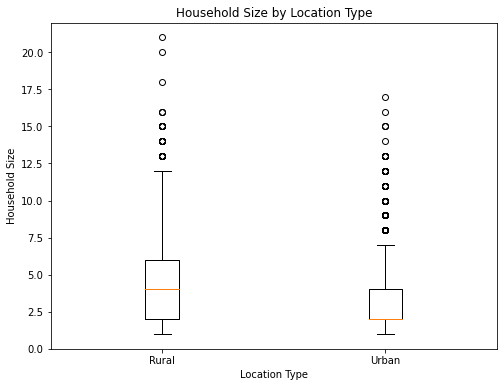

The analysis shows that people in rural areas have a higher household size compared to urban areas.


In [10]:
#Difference in household size between rural and urban areas

# Separate the data for rural and urban areas
rural_household_size = train[train['location_type'] == 'Rural']['household_size']
urban_household_size = train[train['location_type'] == 'Urban']['household_size']

# Plotting the distributions
plt.figure(figsize=(8, 6))
plt.boxplot([rural_household_size, urban_household_size], labels=['Rural', 'Urban'])
plt.title('Household Size by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Household Size')
plt.show()
print('The analysis shows that people in rural areas have a higher household size compared to urban areas.')

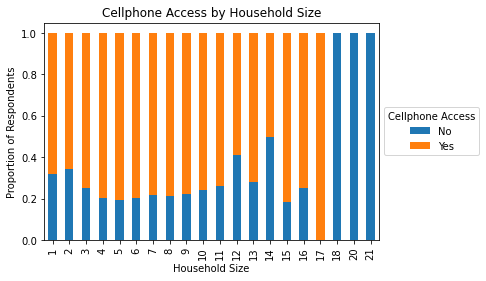

In [11]:
#Relationship between household size and cellphone access

grouped_data = train.groupby('household_size')['cellphone_access'].value_counts(normalize=True).unstack()


grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Household Size')
plt.ylabel('Proportion of Respondents')
plt.title('Cellphone Access by Household Size')
plt.legend(title='Cellphone Access', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



<b/>Demographic analysis

<b/>Gender

In [12]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [13]:
#Distribution of respondents by gender
gender_counts=train['gender_of_respondent'].value_counts()
gender_counts

Female    13877
Male       9647
Name: gender_of_respondent, dtype: int64

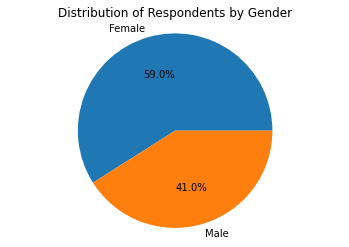

In [14]:
# Create a list of gender labels and a list of corresponding counts
gender_labels = gender_counts.index.tolist()
gender_values = gender_counts.values.tolist()

# Plot the pie chart
plt.pie(gender_values, labels=gender_labels, autopct='%1.1f%%')
plt.title('Distribution of Respondents by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
plt.show()

<b/>Age of respondent

In [15]:
#Descriptive analysis
description=train[['age_of_respondent']].describe()

print(description)
print('The average age of the respondents is approximately 38.81 years.The youngest respondent is 16 years old.the median, 50% of the respondents have an age of 35 or below.The oldest respondent is 100 years old.')

       age_of_respondent
count       23524.000000
mean           38.805220
std            16.520569
min            16.000000
25%            26.000000
50%            35.000000
75%            49.000000
max           100.000000
The average age of the respondents is approximately 38.81 years.The youngest respondent is 16 years old.the median, 50% of the respondents have an age of 35 or below.The oldest respondent is 100 years old.


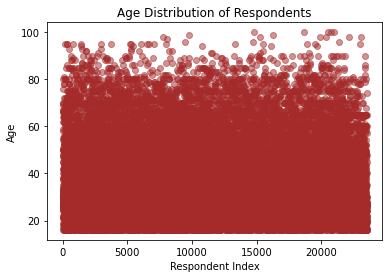

In [16]:
#Scatterplot showing the distribution of ages

# Age distribution data
age_data = train['age_of_respondent']

# Plot the scatter plot
plt.scatter(x=range(len(age_data)), y=age_data, color='brown', alpha=0.5)
plt.xlabel('Respondent Index')
plt.ylabel('Age')
plt.title('Age Distribution of Respondents')
plt.show()


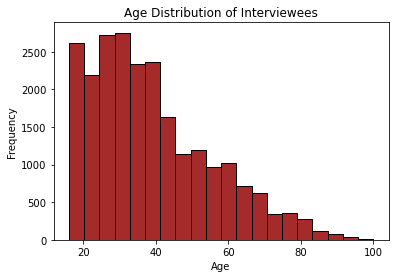

In [17]:
#Age distribution of the interviewees
age_data = train['age_of_respondent']


plt.hist(age_data, bins=20, edgecolor='k',color='brown')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Interviewees')
plt.show()


In [18]:
train.nlargest(10, 'age_of_respondent')


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
14804,Tanzania,2017,uniqueid_2,No,Urban,No,2,100,Male,Head of Household,Single/Never Married,No formal education,Self employed
18698,Tanzania,2017,uniqueid_3896,No,Urban,No,5,100,Male,Parent,Widowed,Primary education,Government Dependent
20508,Tanzania,2017,uniqueid_5706,No,Rural,No,4,100,Female,Child,Widowed,No formal education,No Income
20727,Tanzania,2017,uniqueid_5925,No,Urban,No,3,100,Male,Head of Household,Single/Never Married,Primary education,Self employed
20945,Tanzania,2017,uniqueid_6143,No,Urban,No,2,100,Female,Head of Household,Widowed,No formal education,No Income
9755,Rwanda,2016,uniqueid_3688,No,Urban,No,2,99,Female,Head of Household,Widowed,No formal education,Remittance Dependent
16255,Tanzania,2017,uniqueid_1453,No,Urban,Yes,3,99,Female,Parent,Widowed,No formal education,Remittance Dependent
7750,Rwanda,2016,uniqueid_1683,No,Rural,No,1,98,Male,Head of Household,Widowed,Primary education,Other Income
15226,Tanzania,2017,uniqueid_424,No,Urban,Yes,1,98,Female,Head of Household,Widowed,Primary education,Remittance Dependent
19878,Tanzania,2017,uniqueid_5076,No,Urban,No,1,98,Female,Head of Household,Widowed,No formal education,Remittance Dependent


In [19]:
train.nsmallest(10, 'age_of_respondent')

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
52,Kenya,2018,uniqueid_53,No,Urban,No,5,16,Female,Other relative,Single/Never Married,Primary education,Remittance Dependent
104,Kenya,2018,uniqueid_105,Yes,Urban,No,4,16,Female,Other relative,Single/Never Married,Secondary education,Remittance Dependent
110,Kenya,2018,uniqueid_111,No,Rural,No,3,16,Female,Child,Single/Never Married,Primary education,Remittance Dependent
213,Kenya,2018,uniqueid_214,No,Urban,Yes,6,16,Male,Other relative,Single/Never Married,Secondary education,Remittance Dependent
242,Kenya,2018,uniqueid_243,No,Urban,No,2,16,Male,Other relative,Single/Never Married,Secondary education,Remittance Dependent
281,Kenya,2018,uniqueid_282,No,Rural,No,6,16,Male,Child,Single/Never Married,Primary education,Other Income
311,Kenya,2018,uniqueid_312,No,Rural,No,7,16,Female,Child,Single/Never Married,Primary education,Remittance Dependent
398,Kenya,2018,uniqueid_399,No,Rural,No,2,16,Male,Child,Single/Never Married,Primary education,Remittance Dependent
442,Kenya,2018,uniqueid_443,No,Rural,No,8,16,Male,Child,Single/Never Married,Primary education,Remittance Dependent
447,Kenya,2018,uniqueid_448,No,Rural,No,5,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


<b/>Education

In [20]:
#Education level distribution among respondents
train['education_level'].value_counts()

Primary education                  12791
No formal education                 4515
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Other/Dont know/RTA                   35
Name: education_level, dtype: int64

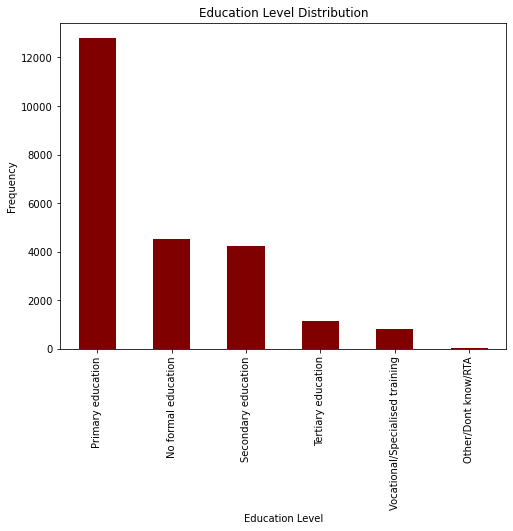

In [21]:
education_levels=train['education_level'].value_counts()

plt.figure(figsize=(8, 6))
education_levels.plot(kind='bar',color='Maroon')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.show()


<Figure size 576x432 with 0 Axes>

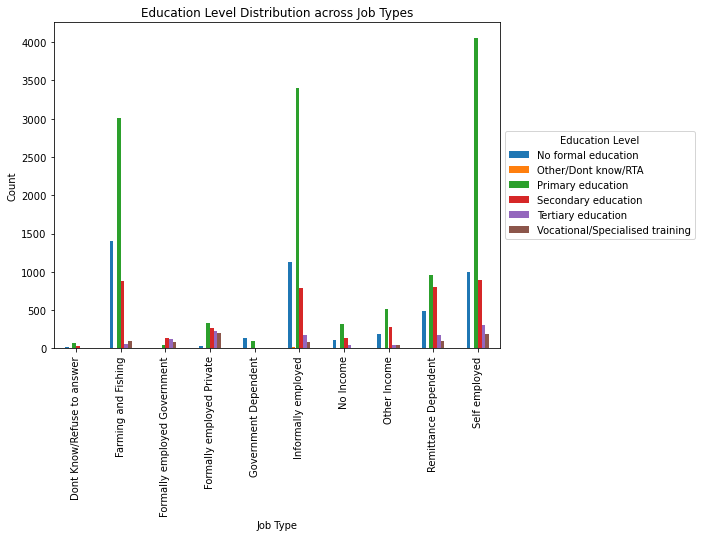

In [22]:
#Education level across different job types


# Select the columns of interest
subset = train[['job_type', 'education_level']]

# Group the data by job type and education level, and count the number of respondents
grouped = subset.groupby(['job_type', 'education_level']).size().unstack()

# Create the bar plot
plt.figure(figsize=(8,6))
grouped.plot(kind='bar', stacked=False,figsize=(8,6))

# Set labels and title
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.title('Education Level Distribution across Job Types')

# Display the legend
plt.legend(title='Education Level', loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()


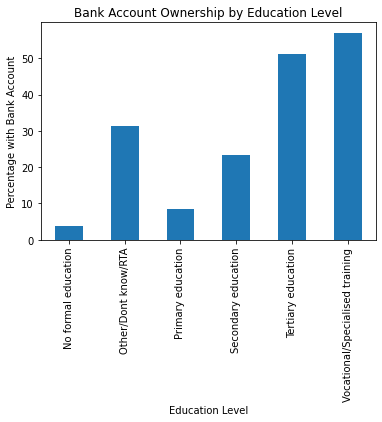

In [23]:
#Relationship between education and ownership of a bank account

# Select the columns of interest
group = train[['education_level', 'bank_account']]

# Group the data by education level and count the number of respondents with or without a bank account
grouped = group.groupby(['education_level', 'bank_account']).size().unstack()

# Calculate the percentage of respondents with a bank account within each education level category
grouped['With Bank Account (%)'] = (grouped['Yes'] / (grouped['Yes'] + grouped['No'])) * 100

# Create the bar plot or pie chart
grouped['With Bank Account (%)'].plot(kind='bar')

# Set labels and title
plt.xlabel('Education Level')
plt.ylabel('Percentage with Bank Account')
plt.title('Bank Account Ownership by Education Level')

# Show the plot
plt.show()


The analysis shows the educated population are the ones who have the highest ownership of bank accounts.

<Figure size 720x432 with 0 Axes>

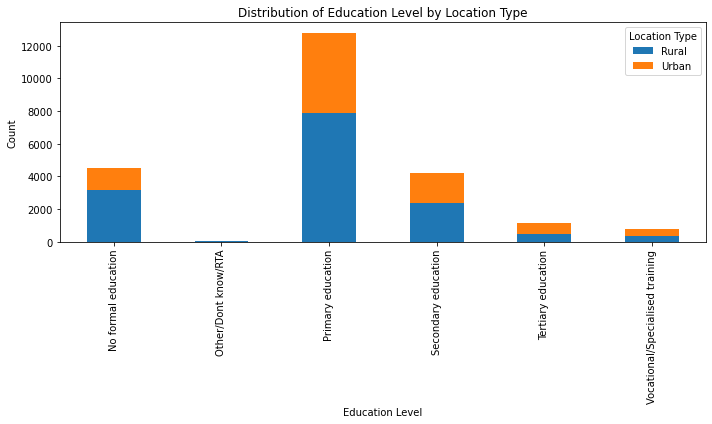

In [24]:
#Relationship between education level and location type in the dataset

# Prepare the data
education_location_data = train.groupby(['education_level', 'location_type']).size().unstack()

# Plot the relationship between education and location type with increased size
plt.figure(figsize=(10, 6)) 
education_location_data.plot(kind='bar', stacked=True, figsize=(10, 6)) 

# Customize the plot
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Level by Location Type')
plt.legend(title='Location Type', loc='best')


# Display the plot
plt.tight_layout()
plt.show()


In [25]:
education_location_counts = train.groupby(['education_level', 'location_type']).size()
print(education_location_counts)


education_level                  location_type
No formal education              Rural            3162
                                 Urban            1353
Other/Dont know/RTA              Rural              19
                                 Urban              16
Primary education                Rural            7899
                                 Urban            4892
Secondary education              Rural            2384
                                 Urban            1839
Tertiary education               Rural             495
                                 Urban             662
Vocational/Specialised training  Rural             384
                                 Urban             419
dtype: int64


<b/>Cell phones

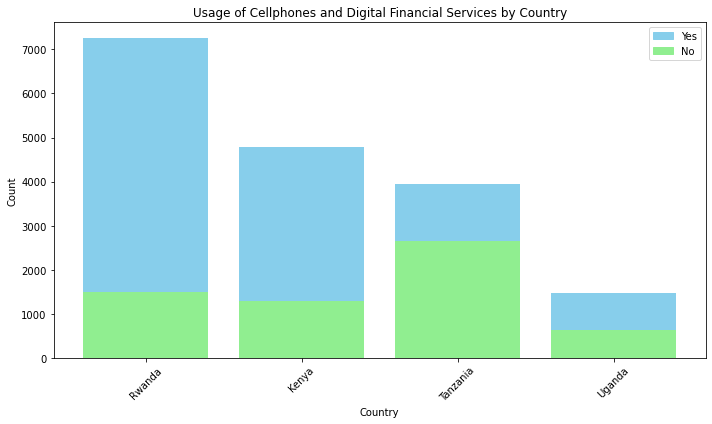

In [26]:
#Analyzing usage of cellphones across different countries in East Africa


# Filter relevant columns
train_filtered = train[['country', 'cellphone_access']]

# Group data by country and cellphone_access
filtered= train_filtered.groupby(['country', 'cellphone_access']).size().reset_index(name='count')

# Sort the grouped DataFrame in descending order based on the count
filtered_sorted = filtered.sort_values(by='count', ascending=False)

# Define colors for 'Yes' and 'No' values
colors = {'Yes': 'skyblue', 'No': 'lightgreen'}

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
for i, row in filtered_sorted.iterrows():
    ax.bar(row['country'], row['count'], color=colors[row['cellphone_access']])

# Add legend
legend_labels = [plt.Rectangle((0, 0), 1, 1, color=colors[label]) for label in colors]
ax.legend(legend_labels, colors.keys())

ax.set_xlabel('Country')
ax.set_ylabel('Count')
ax.set_title('Usage of Cellphones and Digital Financial Services by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [27]:
cellphone_counts = train.groupby(['country', 'cellphone_access']).size()
print(cellphone_counts)

country   cellphone_access
Kenya     No                  1283
          Yes                 4785
Rwanda    No                  1486
          Yes                 7249
Tanzania  No                  2664
          Yes                 3956
Uganda    No                   637
          Yes                 1464
dtype: int64


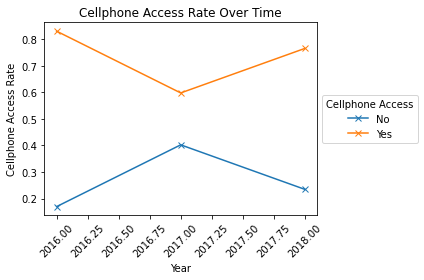

In [28]:
#Cellphone Access over time

# Prepare the data
financial_data = train.groupby('year')['cellphone_access'].value_counts(normalize=True).unstack()

# Plot the time-series data
financial_data.plot(kind='line', marker='x')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Cellphone Access Rate')
plt.title('Cellphone Access Rate Over Time')
plt.legend(title='Cellphone Access', loc='center left', bbox_to_anchor=(1, 0.5))


# Adjust x-axis tick labels
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


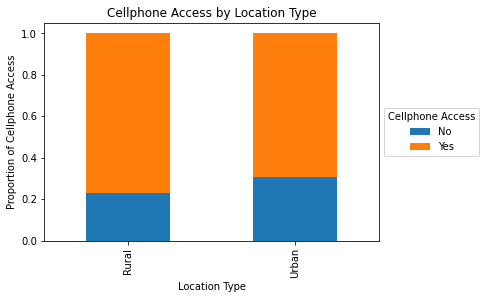

In [29]:
#Relationship between cellphones and location type

# Prepare the data
location_data = train.groupby('location_type')['cellphone_access'].value_counts(normalize=True).unstack()

# Plot the bar chart
location_data.plot(kind='bar', stacked=True)

# Customize the plot
plt.xlabel('Location Type')
plt.ylabel('Proportion of Cellphone Access')
plt.title('Cellphone Access by Location Type')
plt.legend(title='Cellphone Access',loc='center left', bbox_to_anchor=(1, 0.5) )


# Display the plot
plt.show()


In [30]:
cellphone_location_counts = train.groupby(['location_type', 'cellphone_access']).size()
print(cellphone_location_counts)

location_type  cellphone_access
Rural          No                   3273
               Yes                 11070
Urban          No                   2797
               Yes                  6384
dtype: int64


<b/>Bank account

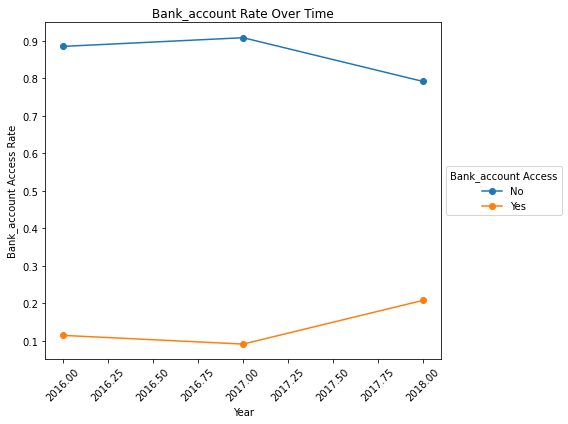

In [31]:
#Bank account Access over time

# Prepare the data
bank_data = train.groupby('year')['bank_account'].value_counts(normalize=True).unstack()

# Plot the time-series data
bank_data.plot(kind='line', marker='o',figsize=(8,6))

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Bank_account Access Rate')
plt.title('Bank_account Rate Over Time')
plt.legend(title='Bank_account Access', loc='center left', bbox_to_anchor=(1, 0.5))


# Adjust x-axis tick labels
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [32]:
#Relationship between bank account and location type

train.groupby('location_type')['bank_account'].value_counts()

location_type  bank_account
Rural          No              12672
               Yes              1671
Urban          No               7540
               Yes              1641
Name: bank_account, dtype: int64